In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from skimage.io import imread


In [20]:
def get_affine_transform(pts1,pts2):
    A=np.zeros((len(pts1)*2,6))
    b=np.zeros(len(pts1)*2)
    M=np.zeros((2,3))
    for i in range(len(pts1)):
        A[i*2,0]=pts1[i][0]
        A[i*2,1]=pts1[i][1]
        A[i*2,2]=1
        A[i*2+1,3]=pts1[i][0]
        A[i*2+1,4]=pts1[i][1]
        A[i*2+1,5]=1
        b[i*2]=pts2[i][0]
        b[i*2+1]=pts2[i][1]
        
    P=np.linalg.pinv(A).dot(b)
    M[0,:]=P[:3]
    M[1,:]=P[3:6]
    return M

In [34]:
def registerImages(ImageOld,ImageNew,n_pts):
    #ImageNew and ImageOld are input images
    #registerdImage is the output image
    #Your code goes here (some steps are given below for your help)
    #1- get correspondence
    
    %matplotlib qt
    plt.figure()
    plt.imshow(ImageOld)
    print("Select 8 points in Old Image")
    pts1=plt.ginput(n=n_pts,timeout=0)
    plt.show()
    plt.figure()
    plt.imshow(ImageNew)
    print("Select corresponding 8 points in New image")
    pts2=plt.ginput(n=n_pts,timeout=0)
    plt.show()
    
    #2- recover transformation (use code of part 1)
    T=get_affine_transform(pts1,pts2)
    #3- Transform ImageOld to a new matrix of ImageNew size – use
    T_Image = cv2.warpAffine(ImageOld, T, (ImageNew.shape[1], ImageNew.shape[0]))
    
    #4- Generate a mask of 1's and 0's (1's will represent where pixels
    #of ImageOld will land and 0's will represent where pixels of
    #ImageNew will land)
    O=np.ones(ImageOld.shape)
    M = cv2.warpAffine(O, T, (ImageNew.shape[1], ImageNew.shape[0]))
    M=np.where(M>0,1,0)
    
    if (ImageNew.shape)==len(ImageOld.shape):
        registeredImage=ImageNew*(1-M)+T_Image*M
    else:
        registeredImage=ImageNew[:,:,0]*(1-M)+T_Image*M
        registeredImage=ImageNew[:,:,1]*(1-M)+T_Image*M
        registeredImage=ImageNew[:,:,2]*(1-M)+T_Image*M
    
    
    
    return registeredImage

## Badshahi Mosque

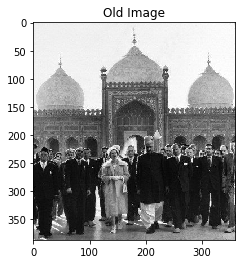

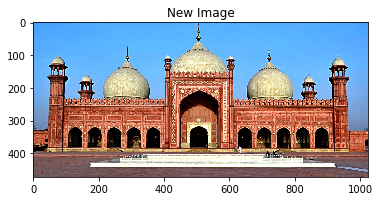

In [22]:
%matplotlib inline
imgold=imread("task2/badshahiOld.jpg")
imgnew=imread("task2/badshahiNew.JPG")
plt.figure()
plt.imshow(imgold)
plt.title("Old Image")
plt.figure()
plt.imshow(imgnew)
plt.title("New Image")
plt.show()

Select 8 points in Old Image
Select corresponding 8 points in New image


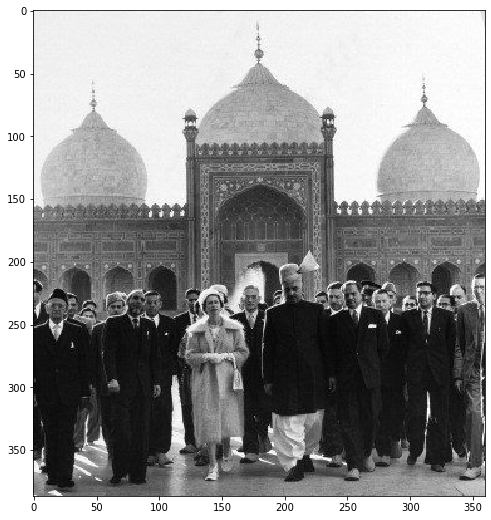

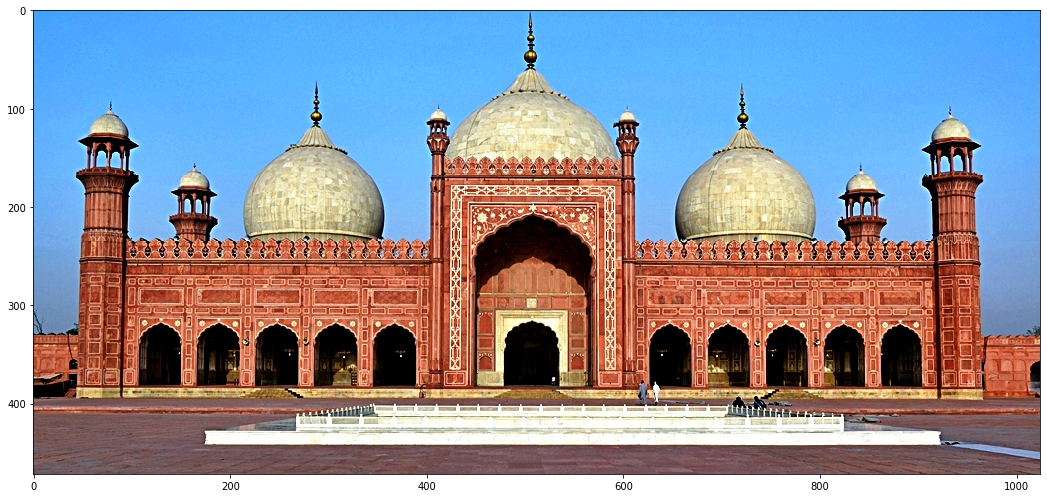

In [23]:
 registeredImage = registerImages(imgold,imgnew,8)

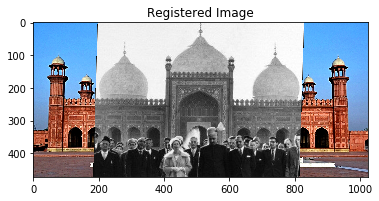

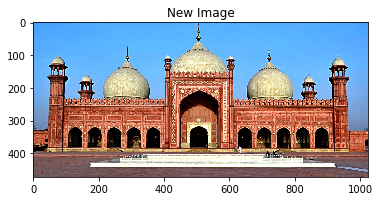

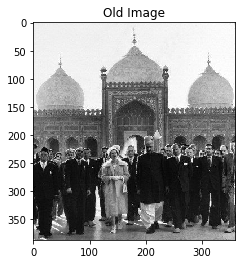

In [24]:
%matplotlib inline
plt.figure()
plt.imshow(registeredImage)
plt.title("Registered Image")
plt.show()
plt.figure()
plt.imshow(imgnew)
plt.title("New Image")
plt.show()
plt.figure()
plt.imshow(imgold)
plt.title("Old Image")
plt.show()

## Faisal Mosque

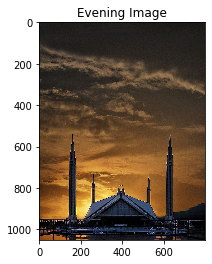

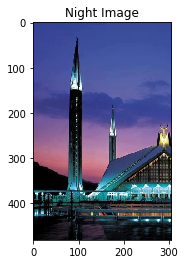

In [25]:
%matplotlib inline
imgeve=imread("task2/faisalMashidEvening.png")
imgnit=imread("task2/faisalMashidNight.png")
plt.figure()
plt.imshow(imgeve)
plt.title("Evening Image")
plt.figure()
plt.imshow(imgnit)
plt.title("Night Image")
plt.show()




Select 8 points in Old Image
Select corresponding 8 points in New image


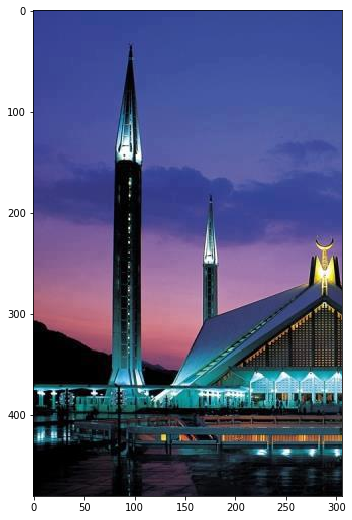

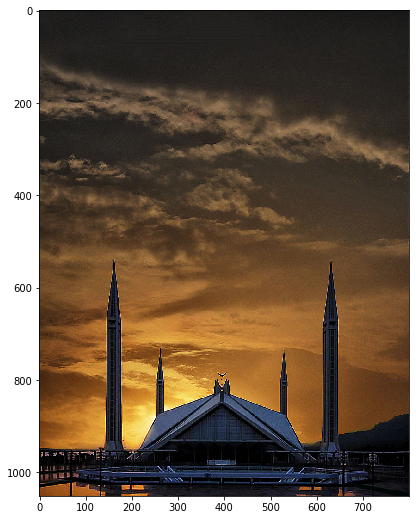

In [27]:
registeredImage = registerImages(imgnit,imgeve,6)

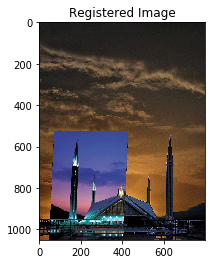

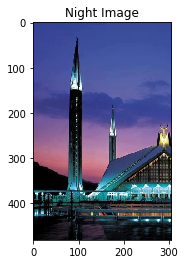

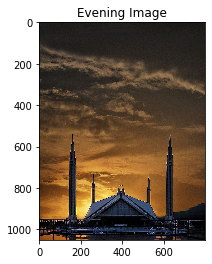

In [28]:
%matplotlib inline
plt.figure()
plt.imshow(registeredImage)
plt.title("Registered Image")
plt.show()
plt.figure()
plt.imshow(imgnit)
plt.title("Night Image")
plt.show()
plt.figure()
plt.imshow(imgeve)
plt.title("Evening Image")
plt.show()

## QLIB

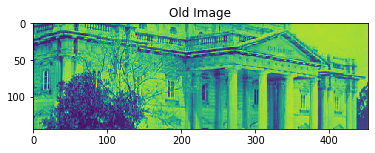

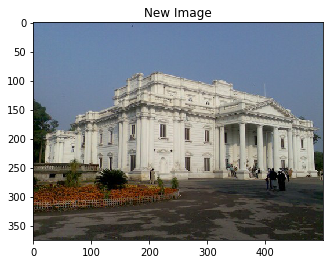

In [29]:
%matplotlib inline
imgold=imread("task2/qlibOld2.jpg")
imgnew=imread("task2/qlibNew.jpg")
plt.figure()
plt.imshow(imgold)
plt.title("Old Image")
plt.figure()
plt.imshow(imgnew)
plt.title("New Image")
plt.show()


Select 8 points in Old Image
Select corresponding 8 points in New image


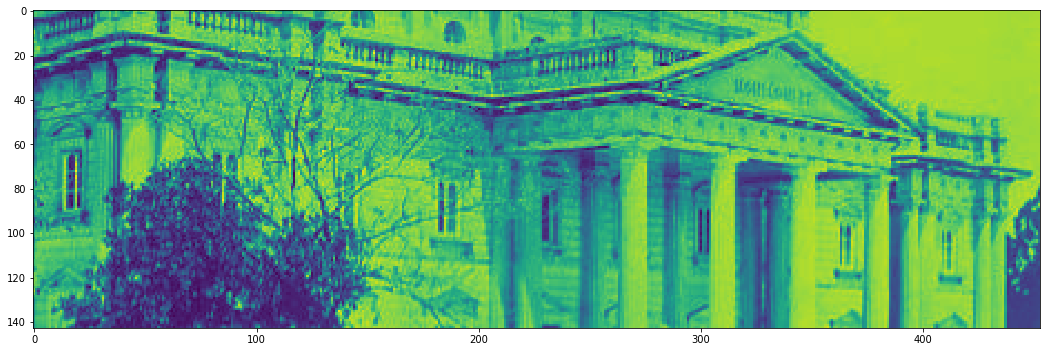

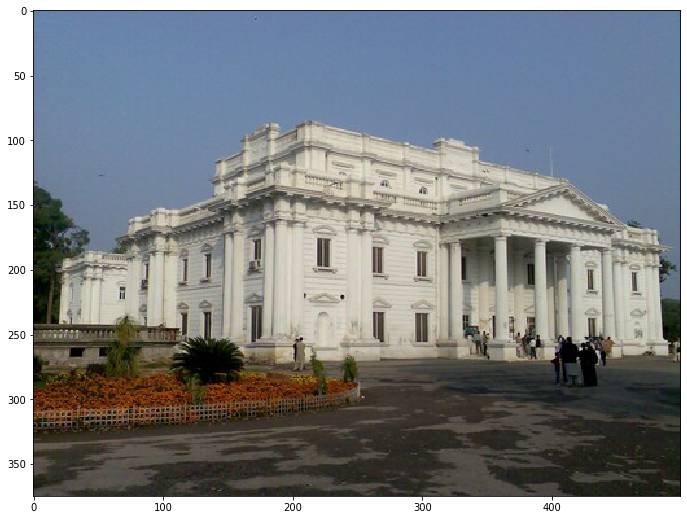

In [35]:
registeredImage = registerImages(imgold,imgnew,6)

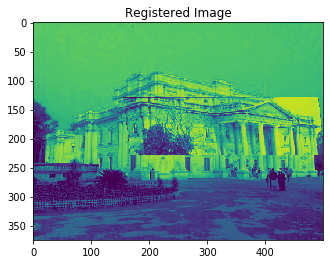

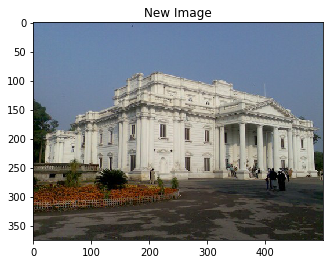

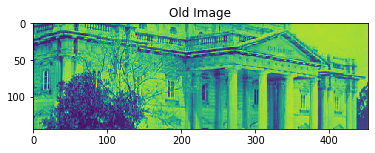

In [36]:
%matplotlib inline
plt.figure()
plt.imshow(registeredImage)
plt.title("Registered Image")
plt.show()
plt.figure()
plt.imshow(imgnew)
plt.title("New Image")
plt.show()
plt.figure()
plt.imshow(imgold)
plt.title("Old Image")
plt.show()

## Clock Tower

In [4]:
from skimage.transform import resize

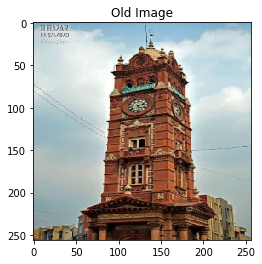

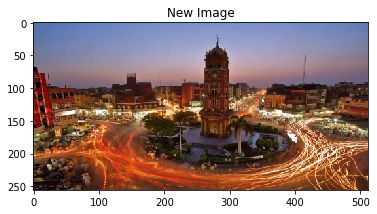

In [16]:
%matplotlib inline
imgold=imread("task2/tower2.jpg")
imgnew=imread("task2/tower1.jpg")
imgold=resize(imgold,(256,256))
imgnew=resize(imgnew,(256,512))
plt.figure()
plt.imshow(imgold)
plt.title("Old Image")
plt.figure()
plt.imshow(imgnew)
plt.title("New Image")
plt.show()

Select 8 points in Old Image
Select corresponding 8 points in New image


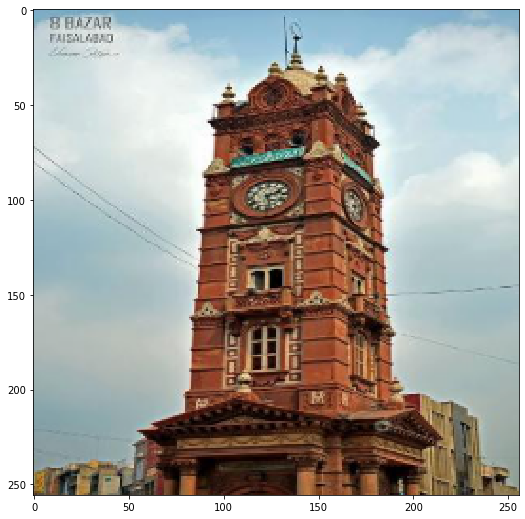

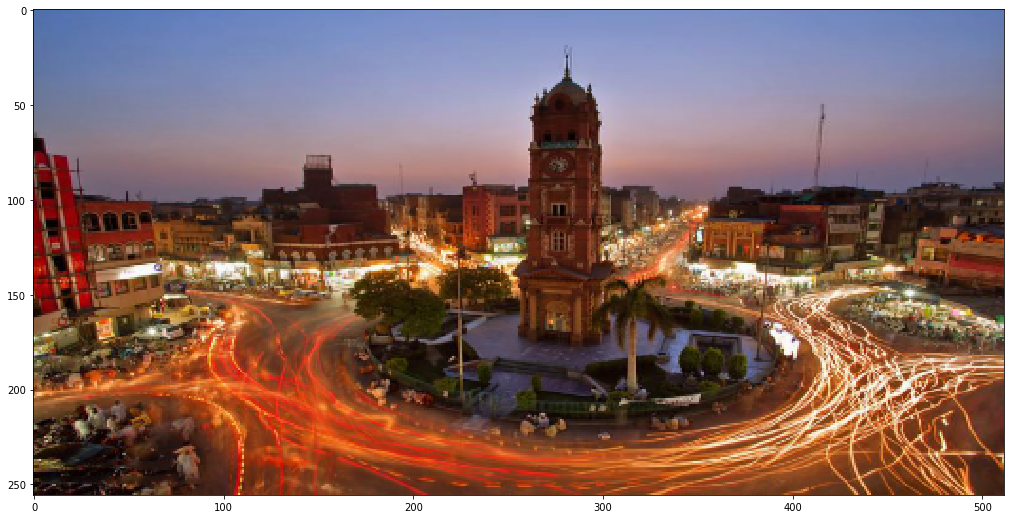

In [17]:
registeredImage = registerImages(imgold,imgnew,6)

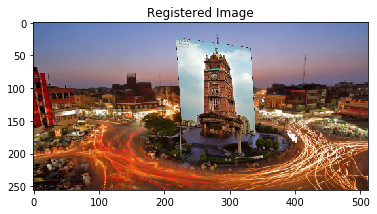

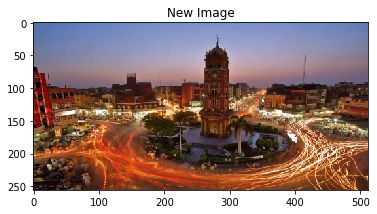

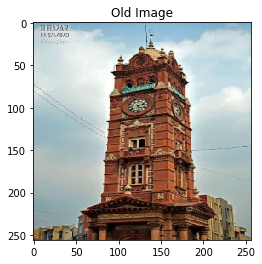

In [18]:
%matplotlib inline
plt.figure()
plt.imshow(registeredImage)
plt.title("Registered Image")
plt.show()
plt.figure()
plt.imshow(imgnew)
plt.title("New Image")
plt.show()
plt.figure()
plt.imshow(imgold)
plt.title("Old Image")
plt.show()